# Interaktiiviset kartat

In [2]:
import pandas as pd             # Pandas-kirjastolla luetaan ja käsitellään dataa
import geopandas as gpd         # GeoPandas on kuin Pandas, mutta sisältää myös geometristä dataa
import matplotlib.pyplot as plt # Matplotlib-kirjastolla visualisoidaan data

In [15]:
cities = gpd.read_file('../data/SuomenKuntajako_2020_250k.mid',encoding='latin1')
cities.head()

/home/juha/anaconda3/envs/ox/lib/python3.9/site-packages/geopandas/geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


,gml_id,natcode,namefin,nameswe,landarea,freshwarea,seawarea,totalarea,geometry
0,1601100430,691,Reisjärvi,Reisjärvi,474.60,28.74,0.00,503.34,"MULTIPOLYGON (((418701.443 7055306.898, 418485..."
1,1601100624,853,Turku,Åbo,245.66,3.47,57.22,306.35,"POLYGON ((249073.975 6725828.546, 248775.530 6..."
2,1601100110,318,Kökar,Kökar,63.57,0.43,2101.02,2165.02,"POLYGON ((172798.744 6674623.732, 173415.386 6..."
3,1601100668,859,Tyrnävä,Tyrnävä,491.82,3.04,0.00,494.86,"POLYGON ((440372.786 7197460.702, 440107.431 7..."
4,1601100521,747,Siikainen,Siikainen,463.29,28.02,0.00,491.31,"POLYGON ((236801.933 6882124.138, 236897.467 6..."


In [13]:
pensioners = pd.read_csv('../data/eläkeläisten_osuus_väestöstä_2018.csv', encoding='latin1', skiprows=1, delimiter=";")
pensioners.head()

,Alue 2020,"Eläkeläisten osuus väestöstä, %, 2018"
0,KOKO MAA,25.9
1,Akaa,27.3
2,Alajärvi,33.0
3,Alavieska,28.7
4,Alavus,32.7


In [14]:
len(pensioners)

400

In [17]:
data = cities.merge(pensioners, left_on='namefin', right_on='Alue 2020')

310

<AxesSubplot:>

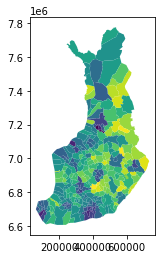

In [18]:
data.plot(column='Eläkeläisten osuus väestöstä, %, 2018')

In [22]:
import json

from bokeh.io import output_file, show, output_notebook, export_png
from bokeh.models import ColumnDataSource, GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.plotting import figure
from bokeh.palettes import brewer

import panel as pn
import panel.widgets as pnw

In [23]:
def get_geodatasource(gdf):    
    """Get getjsondatasource from geopandas object"""
    json_data = json.dumps(json.loads(gdf.to_json()))
    return GeoJSONDataSource(geojson = json_data)

def bokeh_plot_map(gdf, column=None, title=''):
    """Plot bokeh map from GeoJSONDataSource """

    geosource = get_geodatasource(gdf)
    palette = brewer['OrRd'][8]
    palette = palette[::-1]
    vals = gdf[column]
    #Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
    color_mapper = LinearColorMapper(palette = palette, low = vals.min(), high = vals.max())
    color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8, width=500, height=20,
                         location=(0,0), orientation='horizontal')

    tools = 'wheel_zoom,pan,reset'
    p = figure(title = title, plot_height=400 , plot_width=850, toolbar_location='right', tools=tools)
    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = None
    #Add patch renderer to figure
    p.patches('xs','ys', source=geosource, fill_alpha=1, line_width=0.5, line_color='black',  
              fill_color={'field' :column , 'transform': color_mapper})
    #Specify figure layout.
    p.add_layout(color_bar, 'below')
    return p


In [29]:
#def map_dash():
    #"""Map dashboard"""

    #from bokeh.models.widgets import DataTable
    #map_pane = pn.pane.Bokeh(width=400)
    #data_select = pnw.Select(name='dataset',options=list(owid.index))
    #year_slider = pnw.IntSlider(start=1950,end=2018,value=2010)
    #def update_map(event):
        #gdf,key = get_dataset(name=data_select.value,year=year_slider.value)        
        #map_pane.object = bokeh_plot_map(gdf, key)        
        #return
    #year_slider.param.watch(update_map,'value')
    #year_slider.param.trigger('value')
    #data_select.param.watch(update_map,'value')
    #map_pane = pn.pane.Bokeh(width=400)
    #gdf,key = get_dataset(name=data_select.value,year=year_slider.value)        
    #map_pane.object = bokeh_plot_map(gdf, key) 
    #app = pn.Column(pn.Row(data_select,year_slider),map_pane)
    #return app
map_pane = pn.pane.Bokeh(width=400)
map_pane = pn.pane.Bokeh(width=400)      
map_pane.object = bokeh_plot_map(data, 'Eläkeläisten osuus väestöstä, %, 2018') 
app = pn.Column(map_pane)
print(type(app))
#app = map_dash()
show(app)

<class 'panel.layout.base.Column'>


ValueError: "Invalid object to show. The object to passed to show must be one of:

* a LayoutDOM (e.g. a Plot or Widget or Layout)
* a Bokeh Application
* a callable suitable to an application FunctionHandler


In [37]:
import json
from bokeh.io import show
from bokeh.models import (CDSView, ColorBar, ColumnDataSource,
                          CustomJS, CustomJSFilter, 
                          GeoJSONDataSource, HoverTool,
                          LinearColorMapper, Slider)
from bokeh.layouts import column, row, widgetbox
from bokeh.palettes import brewer
from bokeh.plotting import figure# Input GeoJSON source that contains features for plotting
geosource = GeoJSONDataSource(geojson = data.to_json())

AttributeError: 'GeoJSONDataSource' object has no attribute 'crsNames'

In [43]:
# Create figure object.
p = figure(title = 'eläkeläisten määrä, 2018', 
           plot_height = 600 ,
           plot_width = 950, 
           toolbar_location = 'below',
           tools = 'pan, wheel_zoom, box_zoom, reset')
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None# Add patch renderer to figure.
states = p.patches('xs','ys', source = geosource,
                   fill_color = None,
                   line_color = 'gray', 
                   line_width = 0.25, 
                   fill_alpha = 1)# Create hover tool
p.add_tools(HoverTool(renderers = [states],
                      tooltips = [('Kaupunki','@namefin'),
                                ('Eläkeläisten osuus väestöstä (%)','@Eläkeläisten osuus väestöstä, %, 2018')]))
show(p)

RuntimeError: Models must be owned by only a single document, Selection(id='1377', ...) is already in a doc